In [130]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [131]:

a,b = 0,1
c,d = lambda x: x**2, lambda x: x+1
e,f = lambda x,y: y**2, lambda x,y: y+2
g,h = lambda x,y,z: z**2, lambda x,y,z: z+3

funcion = lambda w, z, y, x: x + y + z + w

def integralw(z,y,x):
  return quad(lambda w: funcion(w,z,y,x), g(x,y,z),h(x,y,z))[0]

def integralz(y,x):
  return quad(lambda z: integralw(z,y,x), e(x,y),f(x,y))[0]

def integraly(x):
  return quad(lambda y: integralz(y,x), c(x),d(x))[0]

print(f"El valor de la integral es {quad(integraly, a,b)[0]}")

El valor de la integral es -0.6500971589021813


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



<ipython-input-132-c0c107de82f7>:16: RuntimeWarning: invalid value encountered in scalar divide
  func_A = lambda r,theta: (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta)) * ((2-k)*Kk-2*Ek)/k


Text(0, 0.5, 'Funcion A')

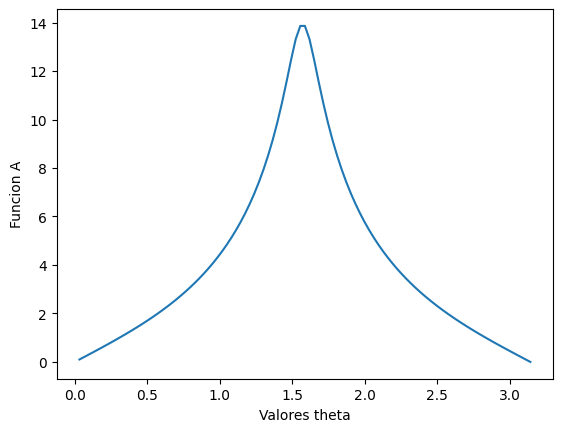

In [132]:
a,I = 1,3

#a)
r = 1.1
k2 = lambda r,theta: (4*a*r*np.sin(theta))/(a**2+r**2+2*r*a*np.sin(theta))
valores_theta = np.linspace(0,np.pi,100)

array2 = np.zeros(len(valores_theta))

j = 0
for i in valores_theta:     #Aqui mi error habia sido poner el contador dentro del ciclo for, fue un error muy chiquito :(
  k = k2(r,i)
  Ek = quad(lambda phi: np.sqrt(1-k*(np.sin(phi))**2), 0, np.pi/2)[0]
  Kk = quad(lambda phi: 1/np.sqrt(1-k*(np.sin(phi))**2), 0, np.pi/2)[0]

  func_A = lambda r,theta: (4*I*a)/np.sqrt(a**2+r**2+2*a*r*np.sin(theta)) * ((2-k)*Kk-2*Ek)/k

  array2[j] = func_A(r,i)
  j += 1

plt.plot(valores_theta,array2)
plt.xlabel("Valores theta")
plt.ylabel("Funcion A")



<ipython-input-133-c5615e49b188>:11: RuntimeWarning: invalid value encountered in scalar divide
  func_A = lambda r,theta: (4*I*a)/np.sqrt(a**2+i**2+2*a*i*np.sin(theta_)) * ((2-k)*Kk-2*Ek)/k


Text(0, 0.5, 'Funcion A')

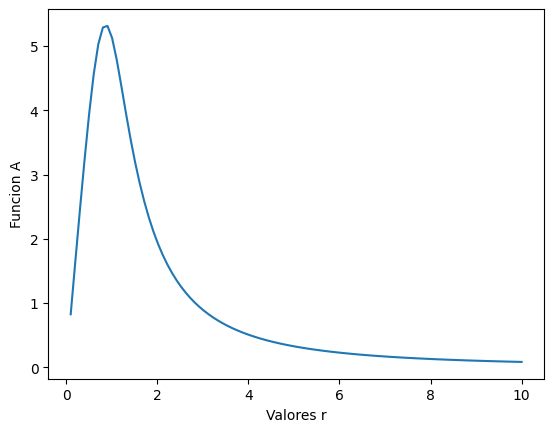

In [133]:
valores_r = np.linspace(0,10,100)
theta_ = np.pi/3
array2_ = np.zeros(len(valores_r))
j = 0

for i in valores_r:
  k = k2(i,theta_)
  Ek = quad(lambda phi: np.sqrt(1-k*(np.sin(phi))**2), 0, np.pi/2)[0]
  Kk = quad(lambda phi: 1/np.sqrt(1-k*(np.sin(phi))**2), 0, np.pi/2)[0]

  func_A = lambda r,theta: (4*I*a)/np.sqrt(a**2+i**2+2*a*i*np.sin(theta_)) * ((2-k)*Kk-2*Ek)/k

  array2_[j] = func_A(i,theta_)
  j += 1

plt.plot(valores_r,array2_)
plt.xlabel("Valores r")
plt.ylabel("Funcion A")

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

'El auto valor es 1.0000000010823729, y su vector asociado es [-0.44720044  0.89443377]'

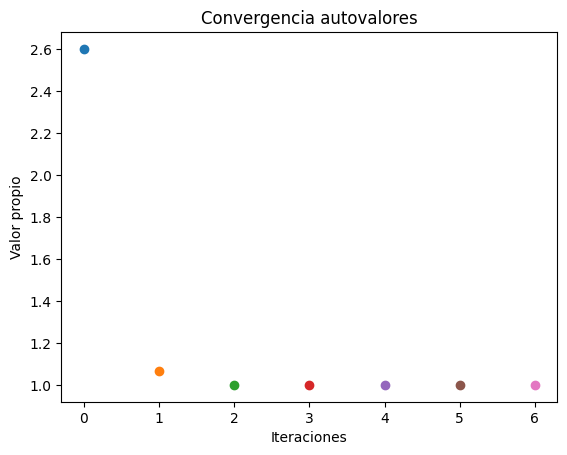

In [134]:
b = np.array([[5,2],
              [2,2]], dtype=float)

def potencia_inversa(A,tol=1e-7,max_iter=1000):
  x = np.random.rand(2)
  x = x / np.linalg.norm(x)
  valor = 1.0
  for k in range(max_iter):
    y = np.linalg.solve(A,x)
    x = y / np.linalg.norm(y)
    new_valor = (x.T@A@x) / (x.T@x)

    plt.plot(k,new_valor,"o")

    if np.abs(new_valor-valor) <= tol:
      return f"El auto valor es {new_valor}, y su vector asociado es {x}"
    plt.title("Convergencia autovalores")
    plt.xlabel("Iteraciones")
    plt.ylabel("Valor propio")

    valor = new_valor
  return "No converge"

potencia_inversa(b)

In [135]:
#Comparar con np.linalg.eig
np.array([])
np.linalg.eig(b)
print(f"El valor proio menos dominante es {np.linalg.eig(b)[0][1]}")
print(f"Su vector propio asociado es [{np.linalg.eig(b)[1][0][1]}, {np.linalg.eig(b)[1][1][1]}]")

El valor proio menos dominante es 1.0
Su vector propio asociado es [-0.4472135954999579, 0.8944271909999159]


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [136]:
A5 = np.array([
    [1,2,3,4,5],
    [3,6,4,7,8],
    [6,13,25,60,10],
    [1,4,7,35,9],
    [8,6,4,2,1]
], dtype=float)

valores5, vectores5 = np.linalg.eig(A5)

print(f"Resultado con valores propios: {np.prod(valores5)}")
print(f"Resultado con funcion det: {np.linalg.det(A5)}")


Resultado con valores propios: (-33304.999999999985+0j)
Resultado con funcion det: -33305.000000000015
